<h1>Step1 : Importing data</h1>

In [69]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [70]:
from sklearn.datasets import load_breast_cancer # load the data 

In [71]:
# create instance of cancer dataset 
cancer = load_breast_cancer()

In [72]:
cancer # data is messed up here

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [73]:
# find the columns or keys from the data 
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [74]:
#evaluate theses keys one by one 
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [75]:
print(cancer['frame'])

None


In [76]:
print(cancer['target_names'])

['malignant' 'benign']


In [77]:
print(cancer['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [78]:
print(type(cancer))

<class 'sklearn.utils.Bunch'>


In [79]:
print(cancer['data'])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [80]:
print(cancer['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [81]:
print(cancer['filename'])

D:\anaconda\lib\site-packages\sklearn\datasets\data\breast_cancer.csv


In [82]:
print(cancer['data'].shape)

(569, 30)


In [83]:
# create a dataframe like sql table 
# np.c_ used to concate two numpy array side by side(left,right)
#onserve how pandas and numpy are used 
#np.append to add feature names
df_cancer = pd.DataFrame(np.c_[cancer['data'], cancer['target']], columns= np.append(cancer['feature_names'],['target']))

In [84]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [85]:
df_cancer.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [86]:
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<h1> Visualize the data and analyse</h1>

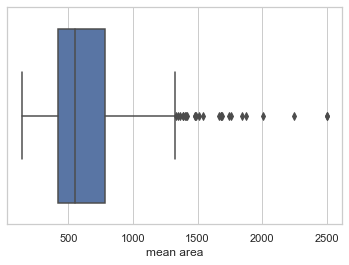

In [87]:
sns.set_theme(style="whitegrid")
bx = sns.boxplot(x=df_cancer['mean area'])

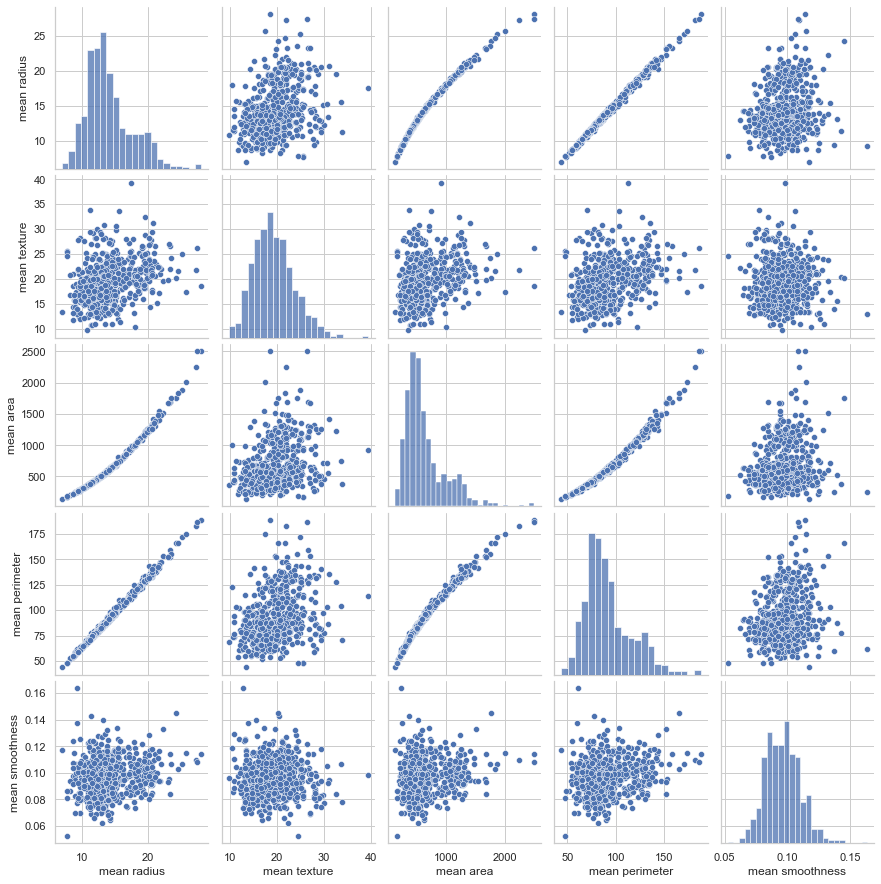

In [88]:
#pair plot to quick glance entire data , vars = variables we need 
sns.pairplot(df_cancer, vars=['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

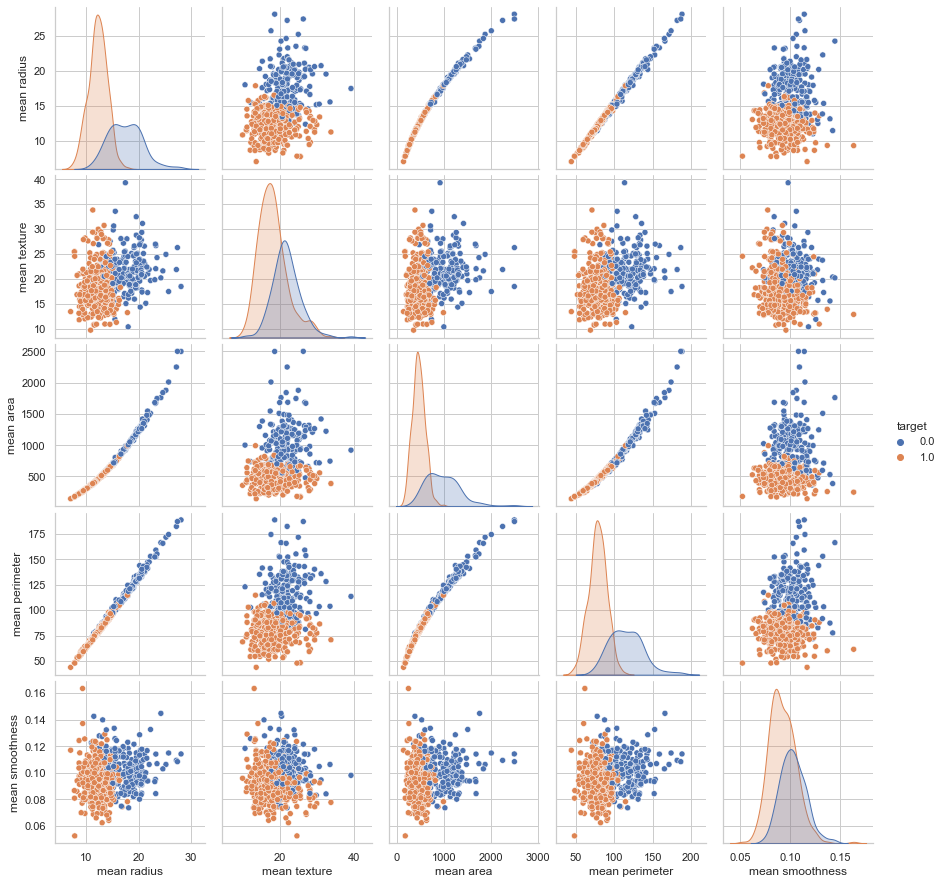

In [89]:
# above code gives the good visulization but difficult to check which one malignant or benign
# therefore use hue and mention 'target' 0 or 1 
sns.pairplot(df_cancer, hue='target', vars=['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

<h4> 0 = melignant 1 = benign, blue are 0 and severe and 1 is orange benign, melignant mean radius area is bigger see the distribution</h4>

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

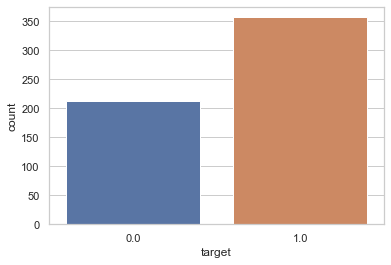

In [90]:
#check the count of benign ~356 and melignnant ~210
sns.countplot(df_cancer['target'])

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

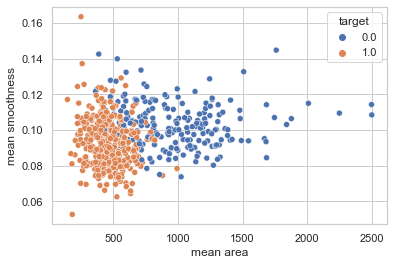

In [91]:
# scatterplot 
sns.scatterplot(x='mean area', y ='mean smoothness', hue='target', data=df_cancer)

<AxesSubplot:>

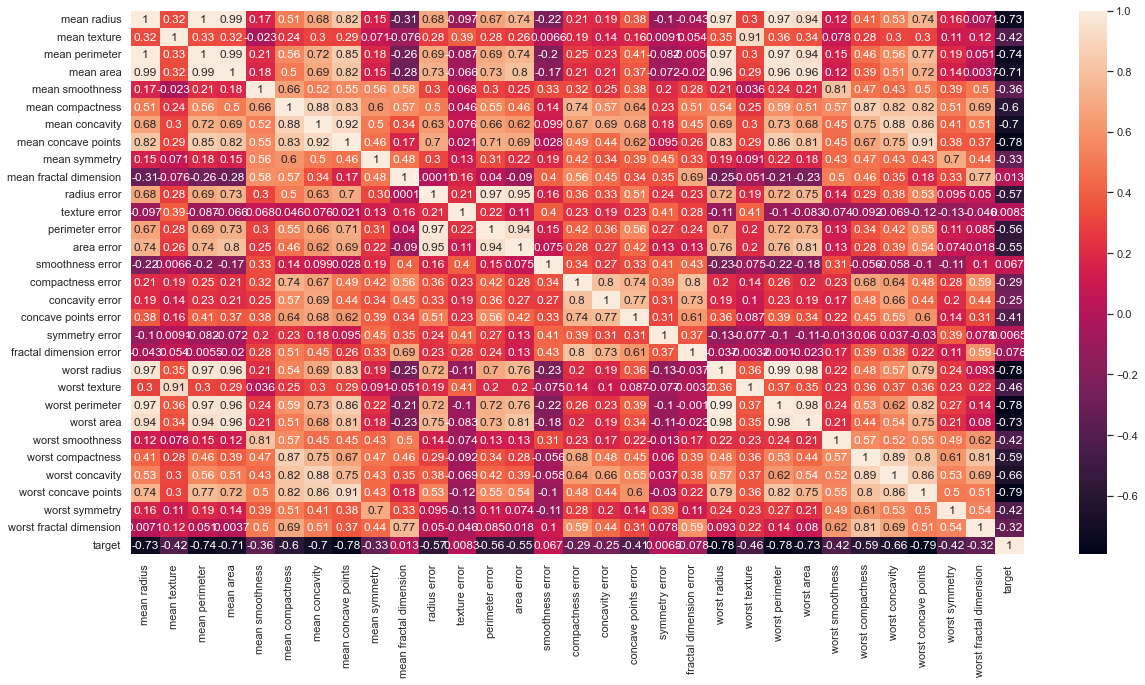

In [92]:
# very important is check how the columns(features) are corelated to each other
# check which are highly corelated
plt.figure(figsize=(20,10))
sns.heatmap(df_cancer.corr(), annot=True)

<h4> covariance is cov(X, Y) = (sum (x - mean(X)) * (y - mean(Y)) ) * 1/(n-1)
     covariane tells how two or more variables are related, works for linearly seperable data.
     numpy provide "cov" method to calculate the covaraince
     diagonal of matrix tell covariance b/w other variable and itself 
     other two variables define covariance of two variable 
    below we 117.96 as covariance and its positive. so both varaibles are change in same direction
    Problem is : not much we can interpret
    </h4>

In [93]:
covariance = np.cov(df_cancer['mean radius'], df_cancer['area error'])

In [94]:
covariance

array([[  12.41892013,  117.96816161],
       [ 117.96816161, 2069.43158287]])

<h4><ul><li>To overcome cov method issue</li>
    <li>Pearson corelation comes into picture  </li>
    <li>tells strength of linear relationship b/w variables</li>
    <li>Pearson's correlation coefficient = covariance(X, Y) / (stdv(X) * stdv(Y))</li>
    <li>The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative    correlation to a full positive correlation </li>
    <li>A value of 0 means no correlation</li>
    <li> tells the corelation and associate p value, lesser the p value .i.e. less than 0.05 then significanty corelated else not corealted</li></ul></h4>

In [95]:
from scipy.stats import pearsonr as pr

In [96]:
corr = pr(df_cancer['mean radius'], df_cancer['area error'])

In [97]:
print('Pearsons correlation: %'  +str(corr))
# not corealted as p value 4.45 is higher than 0.05 
# but pearson corr tellls its 0.73 means positive corelation

Pearsons correlation: %(0.7358636632128177, 4.451152700362094e-98)


In [98]:
corr1 = pr(df_cancer['mean radius'], df_cancer['mean area'])

In [99]:
corr1
# 0.98 Linearl positive corelation and p value 0.0 means less than 0.05 so these 2 variables are highly corelated 

(0.9873571700566124, 0.0)

<AxesSubplot:xlabel='mean radius', ylabel='mean area'>

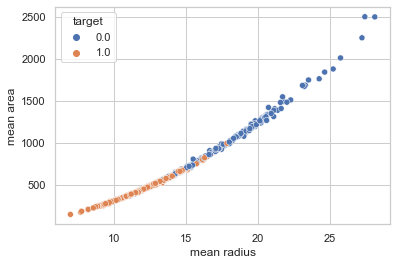

In [100]:
sns.scatterplot(x='mean radius', y= 'mean area', hue='target', data = df_cancer)

<AxesSubplot:>

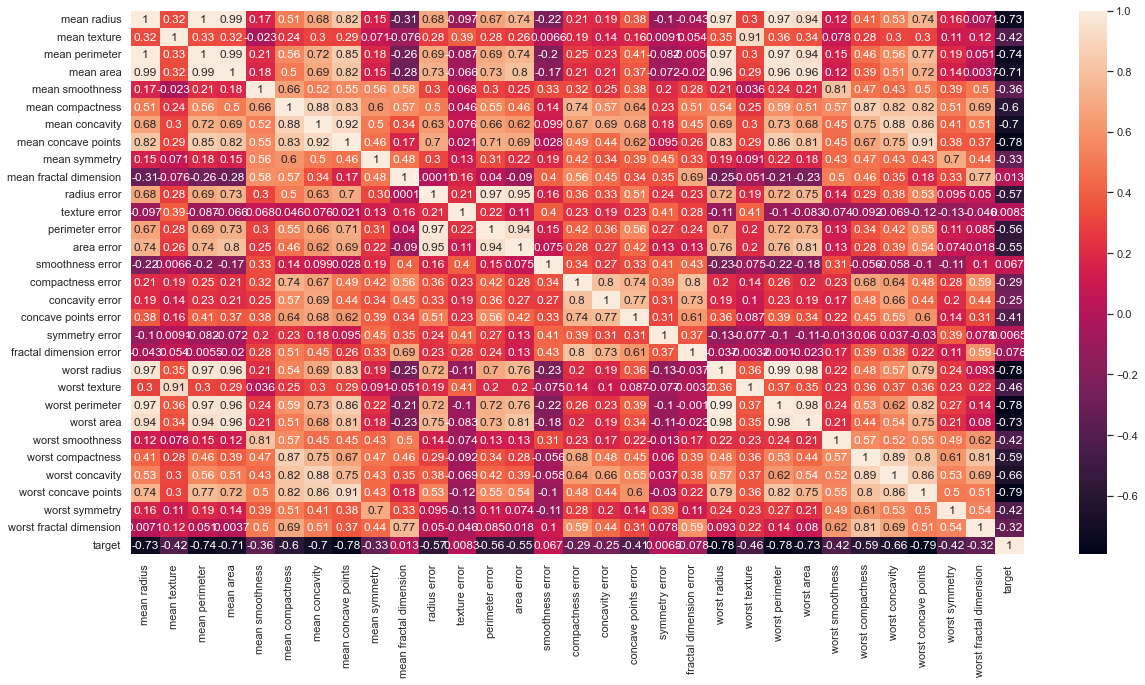

In [106]:
plt.figure(figsize=(20,10))
sns.heatmap(df_cancer.corr(),annot=True)

<h4>Model Training</h4>

In [114]:
# only include the features and drop the target variable by setting axis =1 to drop entire column 
X = df_cancer.drop(['target'], axis = 1)

In [115]:
X.head() # dont have target now 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [109]:
# create only target 
y = df_cancer['target']

In [112]:
y.head(30)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    1.0
20    1.0
21    1.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
Name: target, dtype: float64

In [113]:
# split the data into training and test data 
# use scikit learn 
from sklearn.model_selection import train_test_split

In [117]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33, random_state=5)

In [118]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
115,11.930,21.53,76.53,438.6,0.09768,0.07849,0.03328,0.02008,0.1688,0.06194,...,13.67,26.15,87.54,583.0,0.1500,0.2399,0.15030,0.07247,0.2438,0.08541
141,16.110,18.05,105.10,813.0,0.09721,0.11370,0.09447,0.05943,0.1861,0.06248,...,19.92,25.27,129.00,1233.0,0.1314,0.2236,0.28020,0.12160,0.2792,0.08158
481,13.900,19.24,88.73,602.9,0.07991,0.05326,0.02995,0.02070,0.1579,0.05594,...,16.41,26.42,104.40,830.5,0.1064,0.1415,0.16730,0.08150,0.2356,0.07603
201,17.540,19.32,115.10,951.6,0.08968,0.11980,0.10360,0.07488,0.1506,0.05491,...,20.42,25.84,139.50,1239.0,0.1381,0.3420,0.35080,0.19390,0.2928,0.07867
484,15.730,11.28,102.80,747.2,0.10430,0.12990,0.11910,0.06211,0.1784,0.06259,...,17.01,14.20,112.50,854.3,0.1541,0.2979,0.40040,0.14520,0.2557,0.08181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720
73,13.800,15.79,90.43,584.1,0.10070,0.12800,0.07789,0.05069,0.1662,0.06566,...,16.57,20.86,110.30,812.4,0.1411,0.3542,0.27790,0.13830,0.2589,0.10300
400,17.910,21.02,124.40,994.0,0.12300,0.25760,0.31890,0.11980,0.2113,0.07115,...,20.80,27.78,149.60,1304.0,0.1873,0.5917,0.90340,0.19640,0.3245,0.11980
118,15.780,22.91,105.70,782.6,0.11550,0.17520,0.21330,0.09479,0.2096,0.07331,...,20.19,30.50,130.30,1272.0,0.1855,0.4925,0.73560,0.20340,0.3274,0.12520


In [119]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
28,15.300,25.27,102.40,732.4,0.10820,0.16970,0.16830,0.08751,0.1926,0.06540,...,20.270,36.71,149.30,1269.0,0.1641,0.6110,0.63350,0.20240,0.4027,0.09876
163,12.340,22.22,79.85,464.5,0.10120,0.10150,0.05370,0.02822,0.1551,0.06761,...,13.580,28.68,87.36,553.0,0.1452,0.2338,0.16880,0.08194,0.2268,0.09082
123,14.500,10.89,94.28,640.7,0.11010,0.10990,0.08842,0.05778,0.1856,0.06402,...,15.700,15.98,102.80,745.5,0.1313,0.1788,0.25600,0.12210,0.2889,0.08006
361,13.300,21.57,85.24,546.1,0.08582,0.06373,0.03344,0.02424,0.1815,0.05696,...,14.200,29.20,92.94,621.2,0.1140,0.1667,0.12120,0.05614,0.2637,0.06658
549,10.820,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,0.1976,0.06328,...,13.030,31.45,83.90,505.6,0.1204,0.1633,0.06194,0.03264,0.3059,0.07626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,15.460,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,...,19.260,26.00,124.90,1156.0,0.1546,0.2394,0.37910,0.15140,0.2837,0.08019
440,10.970,17.20,71.73,371.5,0.08915,0.11130,0.09457,0.03613,0.1489,0.06640,...,12.360,26.87,90.14,476.4,0.1391,0.4082,0.47790,0.15550,0.2540,0.09532
533,20.470,20.67,134.70,1299.0,0.09156,0.13130,0.15230,0.10150,0.2166,0.05419,...,23.230,27.15,152.00,1645.0,0.1097,0.2534,0.30920,0.16130,0.3220,0.06386
525,8.571,13.10,54.53,221.3,0.10360,0.07632,0.02565,0.01510,0.1678,0.07126,...,9.473,18.45,63.30,275.6,0.1641,0.2235,0.17540,0.08512,0.2983,0.10490


In [121]:
y_train

115    1.0
141    0.0
481    1.0
201    0.0
484    1.0
      ... 
8      0.0
73     0.0
400    0.0
118    0.0
206    1.0
Name: target, Length: 381, dtype: float64

In [122]:
y_test

28     0.0
163    1.0
123    1.0
361    1.0
549    1.0
      ... 
131    0.0
440    1.0
533    0.0
525    1.0
464    1.0
Name: target, Length: 188, dtype: float64

In [123]:
# test and trian data devided correctly

In [125]:
# build model now, here we are using support vector machine for classification problem
from sklearn.svm import SVC

In [161]:
# to check the evaluation we use confusion matrix and classification_report
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [128]:
# creating the svc model
svc_model = SVC()

In [135]:
#use fit method to apply the svc model on our model , perform training
# it returns the object svc()
# train the model
model =svc_model.fit(X_train,y_train)

# model is not yet evaluate but we just trained the model now
# next will evaluate the model on test data where our model is new to this data
# Confusion matrix
#                                             actual class       
\
# prediction                True                                                False 
#        True                   True +, correcly classified            False + (type 1 error) 
#         False                 False - (type 2 error)                    True - (corrctly classified)

#   type 1 error is not severe, where it says patient may have some disease but in actual he/she is good. 
# type 2 error is very dangerous where it misclassified and predicts that patient is good but in actual patient is not good. This is very dangerous!!
# both False are misclassified data


# Evaluate the model 

In [141]:
y_predict = model.predict(X_test)

In [144]:
y_predict
# model is may be not correct 

array([0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1.])

In [145]:
#call confusion matrix
# we give our actual y value and predicted y value
cm= confusion_matrix(y_test, y_predict)

In [162]:
accuracy_score(y_test, y_predict)

0.9574468085106383

<AxesSubplot:>

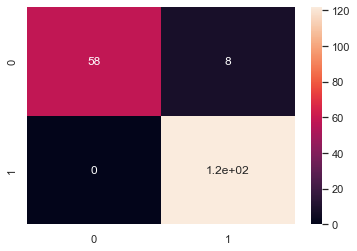

In [147]:
sns.heatmap(cm,annot = True)

In [ ]:
# false positive 8, false negative 0 true positive 1.2e+02 true negative 58

<h2> improving the model
 optimizations
 1)perform standardization
 2) Tune the gamma parameter and c parameter</h2>

In [149]:
# 1)perform standardization
min_x_train = X_train.min()

In [150]:
range_train = (X_train-min_x_train).max()

In [151]:
X_train_scaled = (X_train-min_x_train)/range_train

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

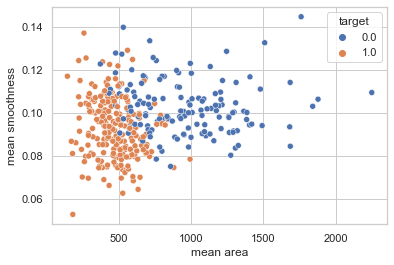

In [152]:
# make sure its correct 
sns.scatterplot(x=X_train['mean area'], y = X_train['mean smoothness'], hue = y_train)

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

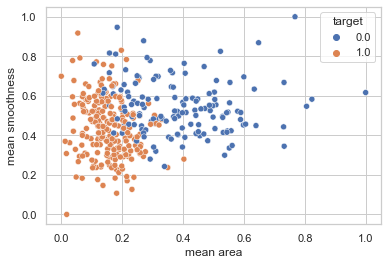

In [153]:
sns.scatterplot(x=X_train_scaled['mean area'], y = X_train_scaled['mean smoothness'], hue = y_train)
# range is from 0.0 to 1 and not high range

In [154]:
min_x_test = X_test.min()
range_test = (X_test-min_x_test).max()
X_test_scaled = (X_test-min_x_test)/range_train

In [155]:
# now use the normalized data for training the model
scaled_model = model.fit(X_train_scaled,y_train)

In [156]:
new_y_predict = scaled_model.predict(X_test_scaled)

In [157]:
cmnew = confusion_matrix(y_test, new_y_predict)

In [163]:
accuracy_score(y_test, new_y_predict)

0.9680851063829787

<AxesSubplot:>

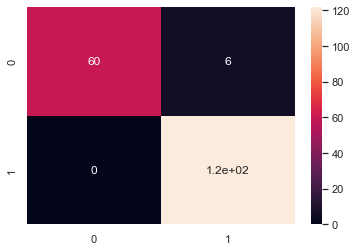

In [158]:
sns.heatmap(cmnew, annot = True)
# use annot to see the 

In [ ]:
# 1.2e+02 is 180 True positive and 60 are True negative correctly classified 
# 6 are False positive type 1 error and no false negative .i.e its value is 0 
# our model accuracy is 96% accuracy = (TP+TN)/(TP+TN+FP+FN)

In [159]:
# will create classification report now 
print(classification_report(y_test, new_y_predict))

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95        66
         1.0       0.95      1.00      0.98       122

    accuracy                           0.97       188
   macro avg       0.98      0.95      0.96       188
weighted avg       0.97      0.97      0.97       188



In [160]:
# Imporoving model 2
# sklearn does grid search and search for best parameters for c and gamma
param_grid = ()